# Tasks 
The first section contains a detailed explanation of each of the weekly tasks requested as part of the course

## Task 1: Create a directory structure
Within VS code. I create a new terminal, and select Git Bash instead of powershell (default). I create a new folder within my `CI_gfmg` repository called `data` by doing in Bash: 

```bash
mkdir data
```
I then change my current directory to the new `data` folder by doing in bash: 
```bash
cd data
```
Within this folder, I now create two new folders by: 
```bash
mkdir timestamps
mkdir weather
```

## Task 2: Timestamps
I first change my current directory to the recently created timestamps folder by: 
```bash
cd ./data/timestamps 
```
I now append the current date to a new `.txt` file by doing:
```bash
date >> now.txt
```
I repeated the above command 10 times, and then I read the `now.txt` file by doing:
```bash
cat now.txt
```
For some reason, within VS code using Bash (not codespace) there are some commands noy available. For instance `more` or `man`. 

## Task 3: Formatting Timestamps
Using the terminal GitBash within VS code, I typed the following: 
```bash
date +'%Y%m%d_%H%M%S' >> formatted.txt 
```
I have also tested how to use it within GitHub CodeSpace. 

## Task 4: Create Timestamped Files
To create a `.txt` file with the current date and time in the format `YYYmmdd_HHMMSS` I used in bash the following: 
```bash
touch date +"%Y%m%d_%H%M%S.txt"
```

## Task 5: Download Today's Weather Data
I already mentioned that, working in bash from VS code, there was a couple of bash functions that were not available including `more` or `man`. I found out that I can run Codespaces from my desktop using a VS Code extension. I found the information to do so here: https://code.visualstudio.com/docs/sourcecontrol/intro-to-git

I could also run it from GitHub directly, but I prefer to do it from my desktop. Within CodeSpace I now run: 
```bash
wget -O weather.json https://prodapi.metweb.ie/observations/athenry/today 
```
The `-O` options allows to save the data within the URL with the name `weather.json`

## Task 6: Timestamp the Data
For this task, we literally combine the commands that we developed in Task 5 and Task 4: 
```bash
wget -O `date +"%Y%m%d_%H%M%S.json"` https://prodapi.metweb.ie/observations/athenry/today 
```

## Task 7: Write the Script
For Task 7, I first create a `weather.sh` file by: 
```bash
touch weather.sh 
```
Once, the empty file is created, I write the following within the `.sh` file:
```bash
#! /bin/bash
wget -O data/weather/`date +"%Y%m%d_%H%M%S.json"` https://prodapi.metweb.ie/observations/athenry/today 
```
The first line of code (called the shebang), defines how this particular script should be run. In this case, it identifies that this particular script should be run as a `bash` command environment. 

The second line, is literally a copy of th command developed in Task 5 (which downloads the weather data for the Athenry station, and saves it with the timestamp of the download date/Time). The only change we have done is hat we have included the directory of where to save the file by adding `data/weather/`, before the name of the file. 

However, when we try to run the `weather.sh` file as a command within the bash terminal, we are answered with a Permission Denied message. To solve this issue we need to: 
```bash
chmod u+x ./weather.sh
```
By doing so, we have made this file executable within the bash terminal. To make this file more informative about how the downloading process is being carried, we can include comments about the downloading process within the `.sh` file using the `echo` command. Finally, we can run this within bash as (making sure we are in the correct directory): 
```bash
./weather.sh
```

## Task 8: Notebook
The task 8 involves creating a notebook called `weather.ipynb` and describing the tasks requested. This is the notebook

## Task 9: pandas 
Use the `pandas` function `read_json()` to load in any one of the weather data files you have downloaded with your script and provide a brief analysis and summary of the data

### Loading the json files 

In [1]:
# Loading libraries
import pandas as pd
import numpy as np 
import os, json 
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import windrose 

# Loading all json files within the data folder. Idea from: https://stackoverflow.com/questions/30539679/python-read-several-json-files-from-a-folder 
path_to_json = './data/weather'
json_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json')]
print(json_files)

# Initialize a list to store all data
data_list = []

# The following loop I modified it slightly using the pd.read_json() function rather than the json.load() function originally used
# in the link above. 
for index, js in enumerate(json_files):
    with open(os.path.join(path_to_json, js)) as json_file:
        #json_text = json.load(json_file)
        tmp = pd.read_json(json_file,convert_dates=False) #Load each of the json files listed in json_files
                                                           # I had to add the convert_dates=False parameter as the data was not being read correctly in some files  

        data_list.append(tmp) # Append each json file in a list

wdata = pd.concat(data_list, ignore_index=True) # Concatenate all json files into a single dataframe. Columns must match! As we are downloading the data
                                                # from a website, I expect the format to be consistent.        

['20250718_113743.json', '20250220_113250.json', '20250505_113325.json', '20250212_113226.json', '20250405_113245.json', '20250830_113237.json', '20250507_113358.json', '20250226_113224.json', '20250519_113416.json', '20250210_113301.json', '20241223_113241.json', '20250420_113245.json', '20250701_113607.json', '20250416_113302.json', '20250228_113240.json', '20250708_113655.json', '20250626_113609.json', '20250119_113225.json', '20250304_113257.json', '20250427_113311.json', '20241204_102658.json', '20250101_113222.json', '20250316_113213.json', '20250209_113214.json', '20250222_113217.json', '20250113_113236.json', '20250604_113648.json', '20250401_113316.json', '20250218_113245.json', '20250622_113337.json', '20250321_113250.json', '20250206_113225.json', '20250817_113321.json', '20250615_113259.json', '20250221_113247.json', '20250827_113246.json', '20241209_102738.json', '20250227_113251.json', '20250829_113257.json', '20250302_113226.json', '20250522_113418.json', '20250501_11324

### Summary and brief analysis of the data 
The loaded data has a total of 15 columns (`wdata.shape`). The information contained in the columns includes the date and time in which the data was reported (`dayname`,`date`,`reportTime`), where the data belongs to (`name`; the location: **Athenry**), and the remaining columns provide information about different weather aspects: 

- Wind: `windspeed` (in kt), `windgust`, `cardinalWindDirection` (N,S,E,W), `Winddirection` (numeric 0-360 degrees)
- Humidity: `humidity` as a % 
- Rainfall: `rainfall` in mm
- Pressure: `pressure` in mbar
- Temperature: `temperature` in <sup>o</sup>C
- Description of the Weather: `weatherDescription`, `text` (both seem to contain the same information)

In [2]:
wdata.shape

(3499, 15)

In [3]:
wdata.head()

,name,temperature,symbol,weatherDescription,text,windSpeed,windGust,cardinalWindDirection,windDirection,humidity,rainfall,pressure,dayName,date,reportTime
0,Athenry,16,04n,Cloudy,"""Cloudy""",9,-,S,180,85,0.0,1010.0,Friday,18-07-2025,00:00
1,Athenry,16,04n,Cloudy,"""Cloudy""",11,-,S,180,86,0.0,1010.0,Friday,18-07-2025,01:00
2,Athenry,16,04n,Cloudy,"""Cloudy""",13,-,S,180,87,0.0,1010.0,Friday,18-07-2025,02:00
3,Athenry,15,46n,Light rain,"""Recent Drizzle """,11,-,S,180,95,0.2,1010.0,Friday,18-07-2025,03:00
4,Athenry,15,04n,Cloudy,"""Cloudy""",13,-,SW,225,96,0.0,1010.0,Friday,18-07-2025,04:00


Although we have downloaded data for just a few days, we can plot the trends in some of the weather information. First we have to create a timestamp (date and time) column, so to plot the data appropriately. 

In [4]:
# Create a timestamp column: 
# I originally tried the options discussed in: 
# https://stackoverflow.com/questions/10624937/convert-datetime-object-to-a-string-of-date-only-in-python
# But I later used chatGPT for the last touch. 
# Basically I add together the date column after converting it to a string to the reportTime column, and then convert all of it to datetime.
wdata['timestamp'] = pd.to_datetime(wdata['date'] + ' ' + wdata['reportTime'],format='%d-%m-%Y %H:%M')

#Extracting season and month for analysis later https://stackoverflow.com/questions/69024042/seasonal-windrose-subplots 
wdata['month'] = pd.to_datetime(wdata['timestamp']).dt.month
wdata["season"] = wdata["timestamp"].dt.month%12 //3 +1

season_dict = {1: "winter", 2: "spring", 
               3: "summer", 4: "autumn"}
wdata["season"] = wdata["season"].map(season_dict)

In [5]:
# Setting the TimeStamp as the index for plotting: 
wdata.set_index('timestamp',inplace=True)
wdata.sort_index(inplace=True)

In [6]:
wdata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3499 entries, 2024-11-04 00:00:00 to 2025-09-06 12:00:00
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   3499 non-null   object 
 1   temperature            3499 non-null   int64  
 2   symbol                 3499 non-null   object 
 3   weatherDescription     3499 non-null   object 
 4   text                   3499 non-null   object 
 5   windSpeed              3499 non-null   object 
 6   windGust               3499 non-null   object 
 7   cardinalWindDirection  3499 non-null   object 
 8   windDirection          3499 non-null   int64  
 9   humidity               3499 non-null   int64  
 10  rainfall               3498 non-null   float64
 11  pressure               3494 non-null   float64
 12  dayName                3499 non-null   object 
 13  date                   3499 non-null   object 
 14  reportTime          

In [7]:
dcolumns = ["temperature","windSpeed","humidity","rainfall","pressure"] # Columns of interest  

#Making sure they all are numeric
wdata[dcolumns] = wdata[dcolumns].apply(pd.to_numeric, errors='coerce')

In [8]:
# Some NA values? 
na_windSpeed = wdata[dcolumns].isna().sum()
na_windSpeed

temperature     0
windSpeed      31
humidity        0
rainfall        1
pressure        5
dtype: int64

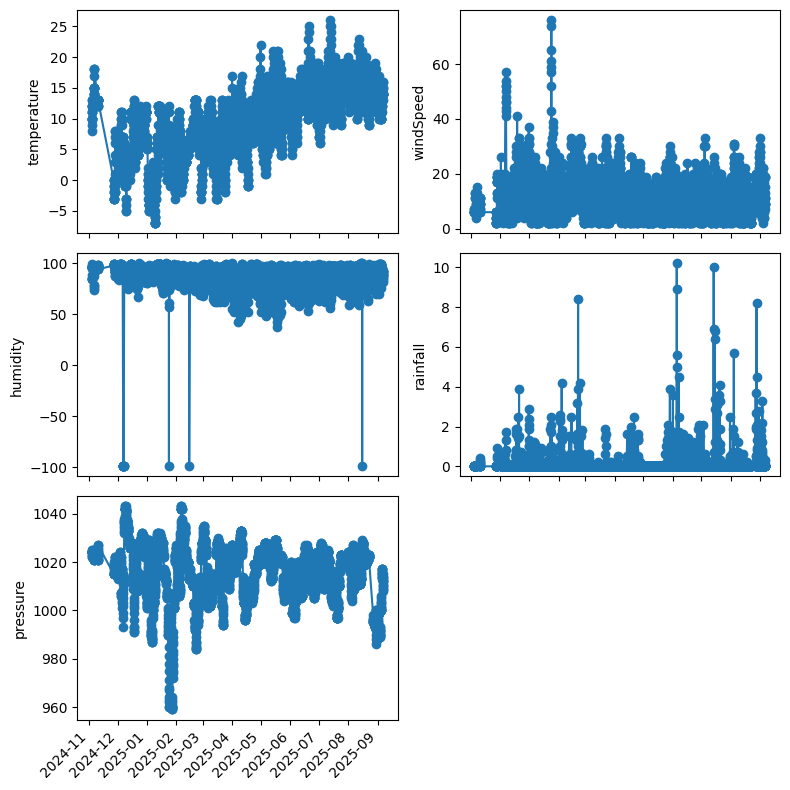

In [9]:
# We will make a plot over some of the columns of interest:
fig, ax = plt.subplots(nrows=3, ncols=2,figsize=(8, 8), sharex=True) #Defining the subplots
axes = ax.flatten() # Flattening the subplots to make it easier to loop through them
                    # Got the idea from: https://stackoverflow.com/questions/28070906/loop-over-2d-subplot-as-if-its-a-1-d

for i,c in enumerate(dcolumns): # c is the column name and i is the index for the plot location
  axes[i].plot(wdata.index, wdata[c], 'o-', label=c)
  axes[i].set_ylabel(c)  # Add title to the y-axis

# Unfortunately, the dates are barely readable. I will rotate them to make them more readable. From ChatGPT
for ax in axes:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_horizontalalignment('right')

axes[-1].set_visible(False) #Remove the last plot as its empty
plt.tight_layout()
plt.show()

From this plots, it may seem as some of the variables are slightly correlated. We can compute the correlation matrix to assist in determining if there is any correlation. There seems to be a very strong negative correlation between humidity and wind speed. However, the time series of data analyzed is still too short to have any conclusion.  

In [10]:
wdata[dcolumns].corr()

,temperature,windSpeed,humidity,rainfall,pressure
temperature,1.000000,0.159563,-0.143202,0.086130,-0.074647
windSpeed,0.159563,1.000000,-0.385594,0.149359,-0.375829
humidity,-0.143202,-0.385594,1.000000,0.086741,-0.000645
rainfall,0.086130,0.149359,0.086741,1.000000,-0.253974
pressure,-0.074647,-0.375829,-0.000645,-0.253974,1.000000


We can also assess the main wind direction and speed over our dataset using a windrose plot. We expect the dominant winds to change over the year, so we will plot it based on each season. Even though the repository currently has limited data to extract definitive conclusions, over time more information will be added. Currently (15/12/2024), with the data extracted, which only includes  few days of Autumn, and the start of the winter, the windrose shows that the most dominant wind direction in Athenry during the autumn and winter was from the East 29.2% and 20.5% of the time respectively, but it is showing that during the Winter winds from the W-NW are becoming more common (approximately 17% of the time each). The windrose also allow to assess the strength of the wind speed (based on colour breaks). For instance, during the Autumn, easterly winds above 13 knots were dominant around 17% of the time. 

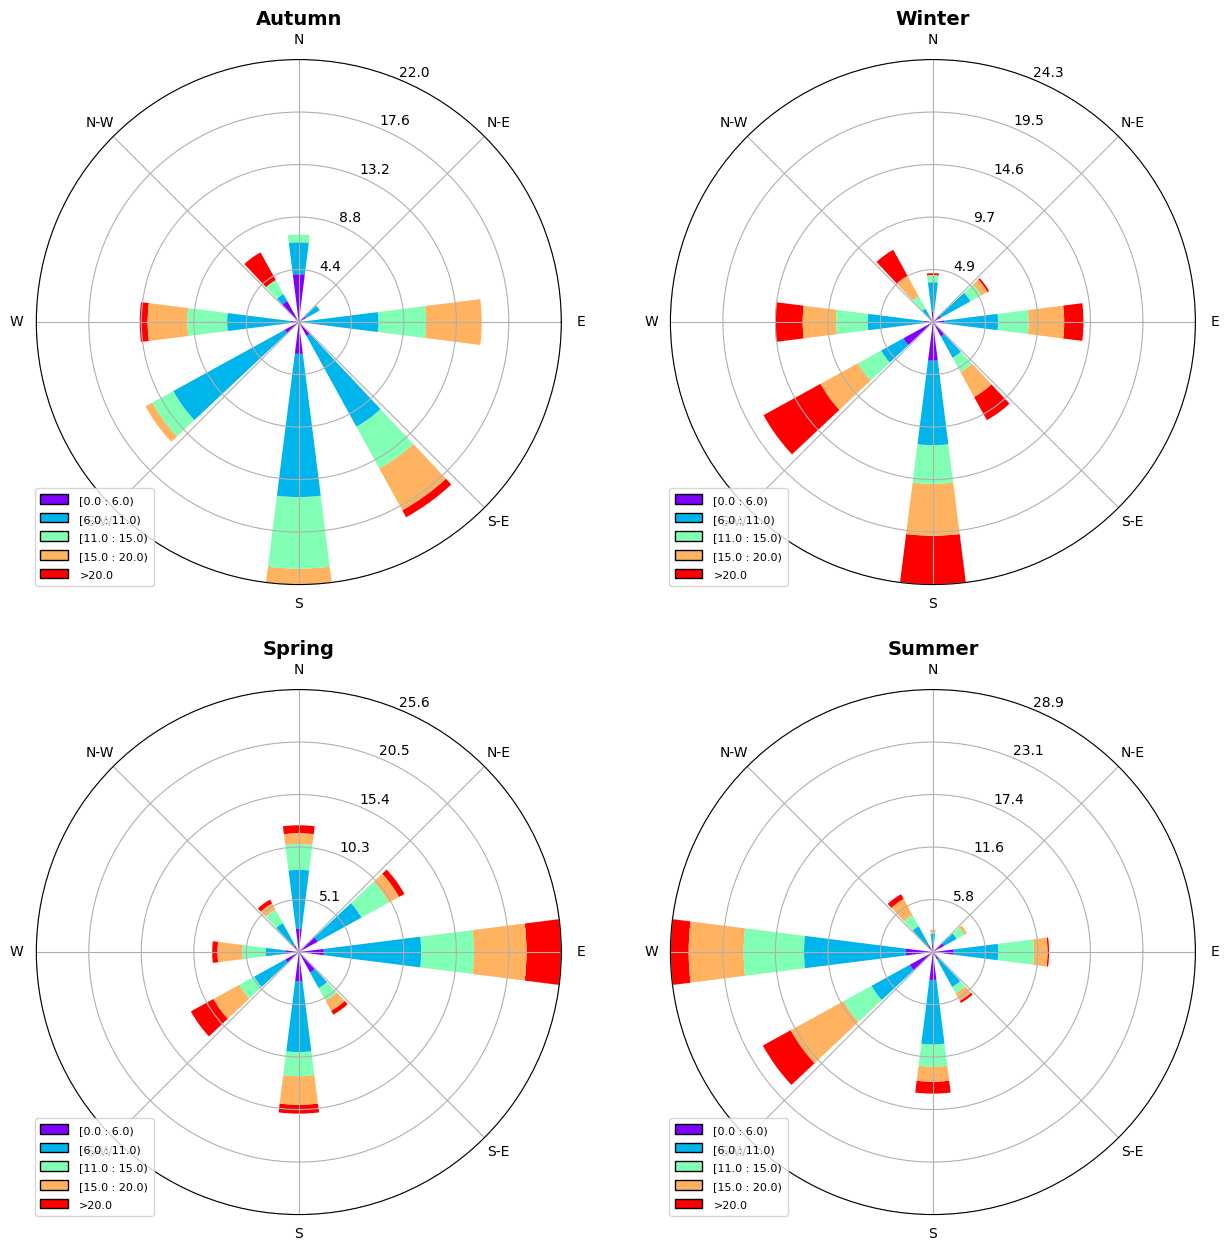

In [11]:
# Idea from: https://stackoverflow.com/questions/69024042/seasonal-windrose-subplots
# Slightly modified to fit the data we have.
# Windrose documentation: https://python-windrose.github.io/windrose/

seasons = wdata['season'].unique()
bins= np.append(0, wdata['windSpeed'].quantile([0.25, 0.5, 0.75, 0.9]).values) #Color breaks of windspeed based on speed quantiles
nrows, ncols = 2, 2
fig = plt.figure(figsize=(15, 15))
fig.tight_layout()

for i, season in enumerate(seasons): #Loop over each season
    d =  wdata[wdata["season"].eq(season)].reset_index(drop=True) #Subset data and create a dataframe d for each season
    ax = fig.add_subplot(nrows, ncols, i + 1, projection="windrose") #Add a subplot for each season (i)
    ax.set_title(season.capitalize(),fontsize=14, weight='bold') #Plot title
    ax.bar(d["windDirection"], d["windSpeed"],
           normed=True, opening=0.8, #Normed equals true means the data is normalized (percentage)
           bins=bins, 
           cmap=cm.rainbow, #A different colour schema
           nsector=20)
    ax.set_legend()

# Project 

As part of the project for the Computer Infrastructure Course, we will automate the `weather.sh` script to run daily and push the new data to our repository. 

First, we start by creating a new directory within our repository:  
```bash
mkdir -p .github/workflows  #The -p allows to create a folder within an empty folder 
```
Within this directory, we create a new file: 
```bash 
touch weather-data.yml
``` 

Following Ian Lectures, we used GitHub Copilot and ChatGPT to modify the `weather-data.yml` script. The `.yml` script will allow to run the `weather.sh` script automatically and therefore download the Athenry daily weather data. The `.yml` file contains my comments indicating what are some of the most important features of this script. 

## Project improvements
I have extended this project further by also automating the rendering of this notebook, by also defining a github workflow called `jupyter-updated.yml`. I searched online (https://stackoverflow.com/questions/63343937/how-to-use-the-github-actions-workflow-run-event; also with the help of ChatGPT) how I could automate this workflow just after the download of the data was carried, and I found out it could be done by: 

```yaml
 on:
   workflow_run:
     workflows:
       - Weather Data Workflow  # The exact name of your weather-data.yml workflow
     types:
       - completed  
```

I have tested that this setup works by manually dispatching the `Weather Data Workflow` and then checking that the `Update Weather Analysis Notebook` workflow was automatically dispatched. 

On the 12/11/2024, an error was triggered on the `Update Weather Analysis Notebook`. The error was produced because the data downloaded by the `weather.sh` saved and empty `.txt` file. Upon inspection of the `Weather Data Workflow` event dispatch, I found an error indicating **Resolving prodapi.metweb.ie (prodapi.metweb.ie)... failed: Name or service not known.**. This error seemed to be caused by Met Eireann blocking our request to download the data, possibly as all the students from the ATU Masters were downloading the Athenry station data at 10AM every day. 

We solved this issue by: 

1. Changing the download time to 11:30AM every day in the `Weather Data Workflow`

2. Even though the `weather.sh` could not access the daily data, it did save an empty `.txt` file. It was not until the `Update Weather Analysis Notebook` was dispatched and tried to update the Notebook that the user would know of an issue with the data. I consider this behavior inappropriate, if no data could be downloaded, it should be notified by the `weather.sh` script. To do so, I have included an `if` statement with help of ChatGPT that checks if the data has been successfully downloaded and otherwise exits the download and produces an error message: 

```bash
# Check if wget succeeded
if [[ $? -ne 0 ]]; then
  echo "## Error: Failed to download weather data. No file saved."
  exit 1  # Exit the script with a failure status
fi
``` 

# End